# How to create stacked bar charts based on specified columns in a DataFrame, with each chart displaying the distribution of a variable and variable name.


## Connect to your Google Drive

In [13]:
# Connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Import required libraries

In [6]:
import pandas as pd
import sqlite3
import csv
import numpy as np
import matplotlib.pyplot as plt

# Set option to see all columns in output (I like to do this - you don't have to)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

## 2. Import a .csv file to use as an example:

In [3]:
# Import the the .csv file from a google drive folder path
raw_df = pd.read_csv('/content/drive/MyDrive/Ryan Other Data Science Projects/Creating a Function with Bar Charts/Customer-Churn-Records.csv',
                     header=0)
df = raw_df.head(500)

print(df.shape)
df.head(1)

(500, 18)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1,1,2,DIAMOND,464


## 3. Identify the target variable and which variables you want to exclude from the stacked bar chart function

In [17]:
# Identify the target varible for the barcharts
df['exited_flag'] = np.where(df['Exited'] == 1,"yes","no")
#df['exited_flag'] = np.where(df.loc[:, column_index] == 1, 'yes', 'no')
target_variable = 'exited_flag'

# Identify the variables to exclude from barchart
excluded_variables = ('RowNumber','CustomerId','Surname','Balance','EstimatedSalary','Point Earned','CreditScore')

<ipython-input-17-8c3f7ad92549>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['exited_flag'] = np.where(df['Exited'] == 1,"yes","no")


## 4. Create the stacked_barchart function to iterate through your DataFrame

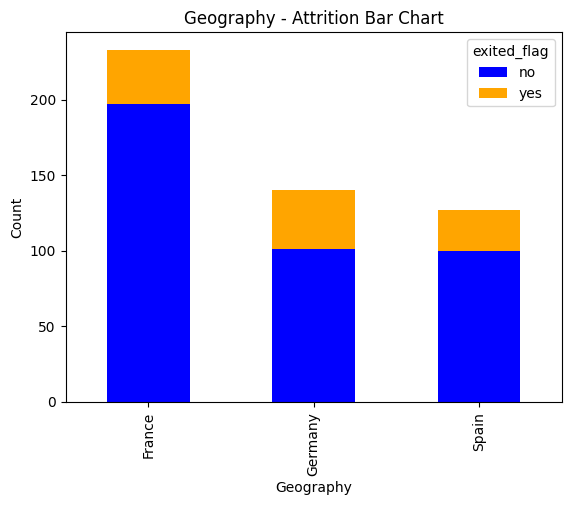

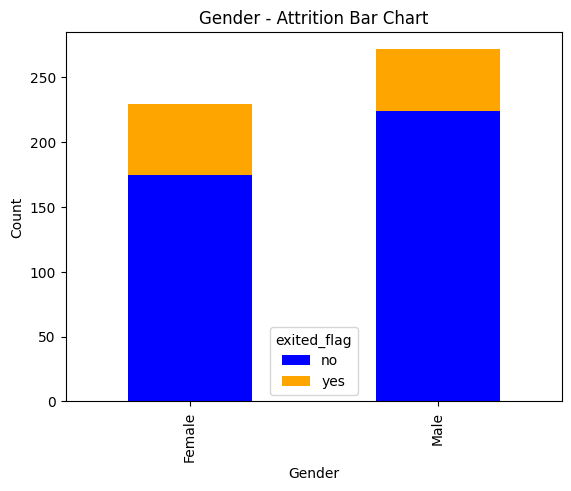

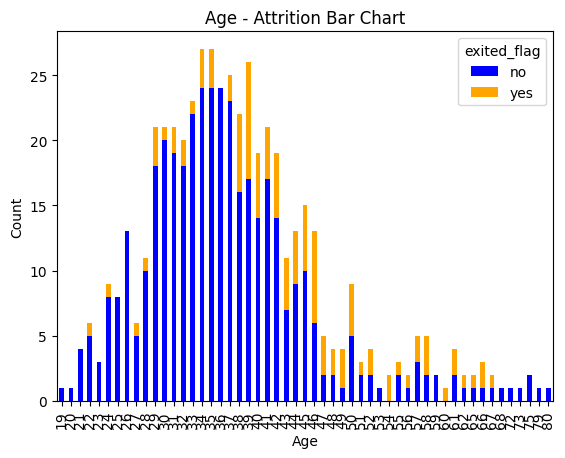

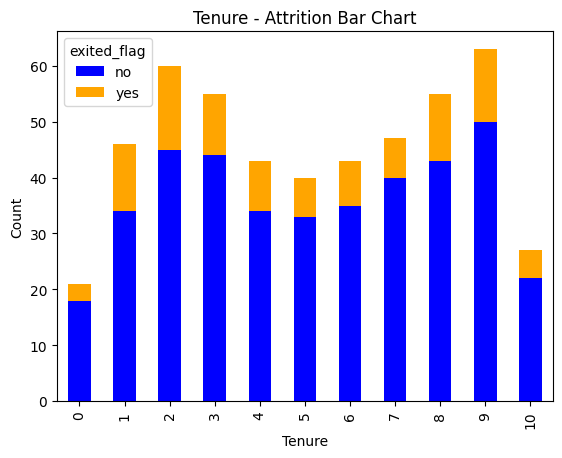

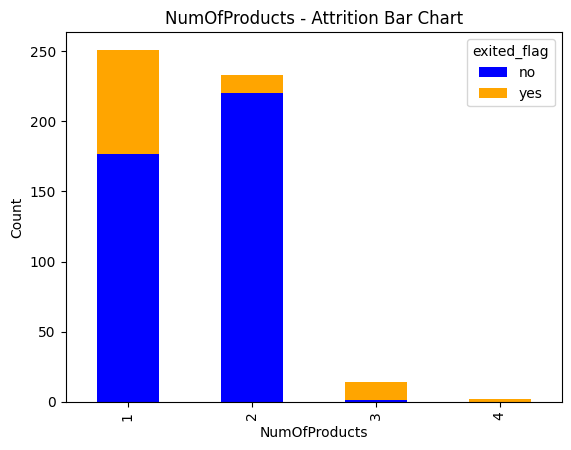

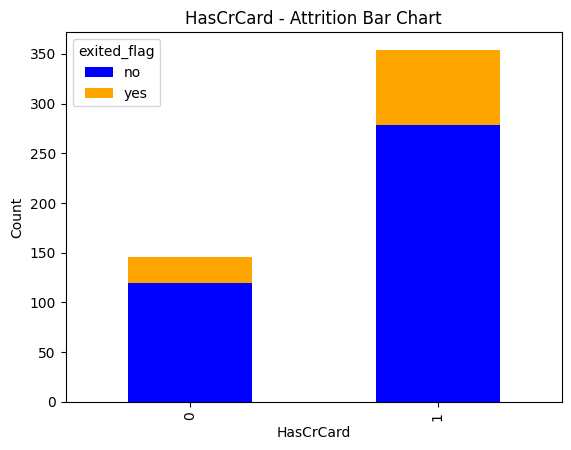

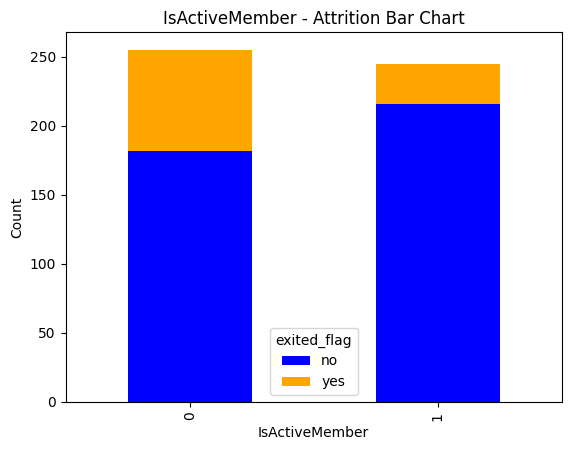

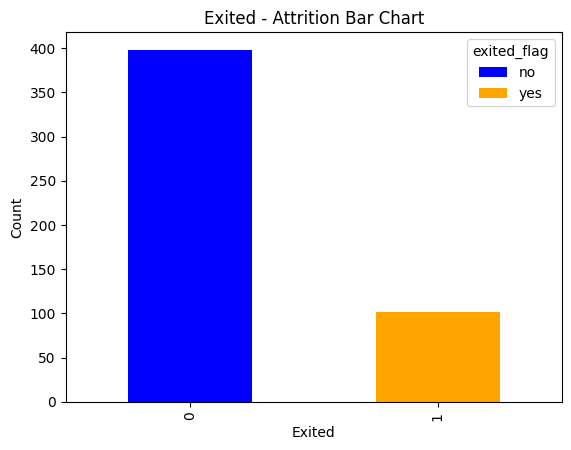

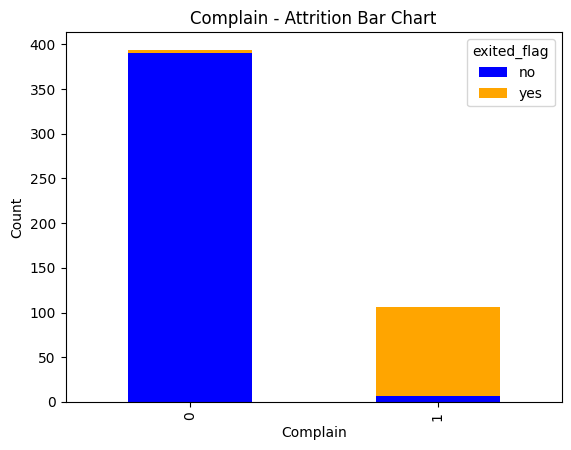

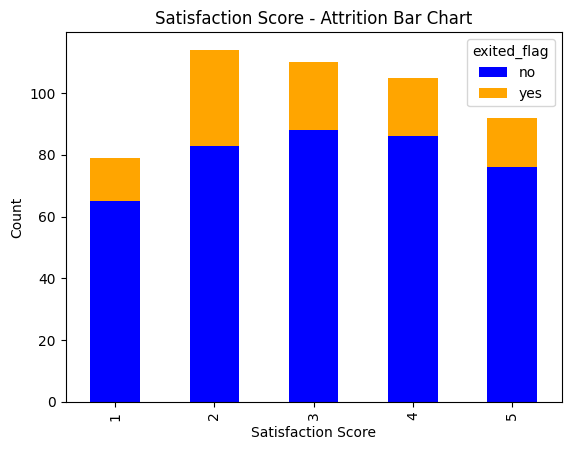

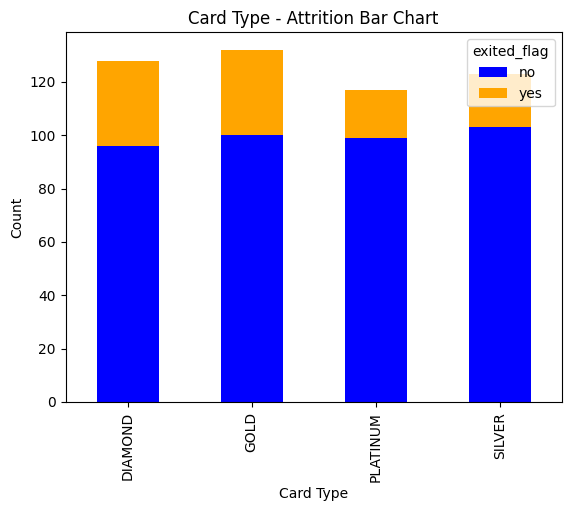

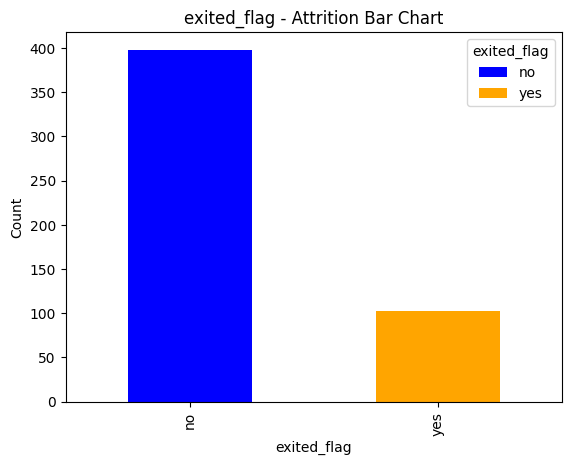

In [18]:
# Create function to produce barcharts by the identified target_variable
def stacked_barchart(df):
    # Place column names into an object
    col_names = df.columns
    # Iterate through column names
    for name in col_names:
        if name in excluded_variables:
            pass
        else:
            # Create the stacked barchart for each attribute
            stacked_bar = pd.crosstab(df[name], df[target_variable])
            ax = stacked_bar.plot(kind='bar', stacked=True, title=f'{name} - Attrition Bar Chart', color=['blue', 'orange'])
            ax.set_xlabel(name)  # Set x-axis label
            ax.set_ylabel("Count")  # Set y-axis label
            ax.legend(title=target_variable)  # Set legend with target_variable as the title
            plt.show()  # Display the chart

# Call the function with the dataframe to create bar charts
stacked_barchart(df)